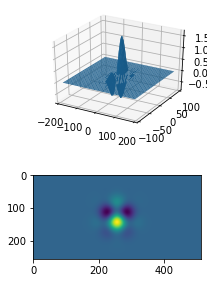

In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, fftfreq
import matplotlib.pyplot as plt

Lx = 120*np.pi
Ly = 60*np.pi
Nx = 512
Ny = 256
x = np.linspace(-Lx/2,Lx/2,Nx)
y = np.linspace(-Ly/2,Ly/2,Ny)
X,Y = np.meshgrid(x,y)

def test_func(x,y):
    exponent = -(x**2+y**2)
    return (np.cos(x/10)+np.sin(y/10))*np.exp(exponent/1000)

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
Z = test_func(X,Y)
ax1.plot_surface(X,Y,Z)
ax2 = fig.add_subplot(212)
ax2.imshow(Z)

Define test function.
Should decay to zero on boundary of domain, so that
fft applies

norm of difference 0.00813540321053159
norm of exact 4.157191040581497
rel err 0.001956947162426683
sum of exact f_x -5.344379791689426e-16
sum of fft f_x 2.6754846422512952e-15
mean of exact f_x -4.077438195563832e-21
mean of fft f_x 2.0412327898035394e-20
max of exact f_x 0.09685545495040623
max of fft f_x 0.09704499595813564
min of exact f_x -0.09685545495040623
min of fft f_x -0.09704499595813923
std dev of f_x 0.011482726466731007
std dev of fft f_x 0.011505197555706998
max diff 0.0001895410077329962


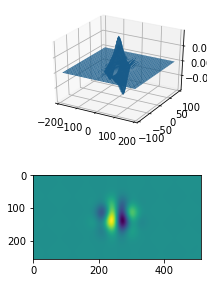

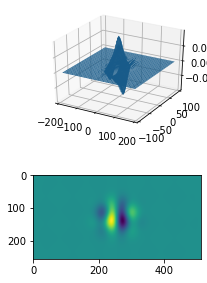

In [2]:
def test_func_x(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/1000)
    top_trig = x*np.sin(y/10)+50*np.sin(x/10)+x*np.cos(x/10)
    return -top_exp*top_trig/500

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_x = test_func_x(X,Y)
ax1.plot_surface(X,Y,f_x)
ax2 = fig.add_subplot(212)
ax2.imshow(f_x)

def fft_partial_x(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2(1j*Kx*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_x = fft_partial_x(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_x)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_x)

print("norm of difference",np.linalg.norm(f_x-fft_f_x))
print("norm of exact",np.linalg.norm(f_x))
print("rel err", np.linalg.norm(f_x-fft_f_x)/np.linalg.norm(f_x))
print("sum of exact f_x",np.sum(f_x))
print("sum of fft f_x",np.sum(fft_f_x))
print("mean of exact f_x",np.mean(f_x))
print("mean of fft f_x",np.mean(fft_f_x))
print("max of exact f_x",np.max(f_x))
print("max of fft f_x",np.max(fft_f_x))
print("min of exact f_x",np.min(f_x))
print("min of fft f_x",np.min(fft_f_x))
print("std dev of f_x",np.std(f_x))
print("std dev of fft f_x",np.std(fft_f_x))
print("max diff",np.max(np.abs(f_x-fft_f_x)))

norm of difference 0.016303221074365562
norm of exact 4.157191027212921
rel err 0.003921691586372836
sum of exact f_y -0.0010053901949889088
sum of fft f_y -2.9976021664879227e-15
mean of exact f_y -7.670518455420752e-09
mean of fft f_y -2.286988957586611e-20
max of exact f_y 0.10121830900846393
max of fft f_y 0.10161524419856062
min of exact f_y -0.08668165152236523
min of fft f_y -0.08702154384661043
std dev of f_y 0.011482726429802623
std dev of fft f_y 0.0115277567233521
max diff 0.00039693519009668943


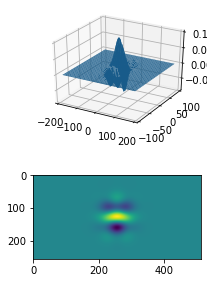

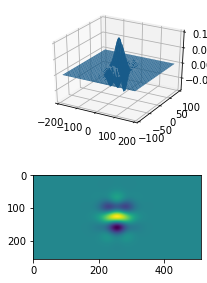

In [3]:
def test_func_y(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/1000)
    top_trig = -y*np.cos(x/10)+50*np.cos(y/10)-y*np.sin(y/10)
    return top_exp*top_trig/500

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_y = test_func_y(X,Y)
ax1.plot_surface(X,Y,f_y)
ax2 = fig.add_subplot(212)
ax2.imshow(f_y)

def fft_partial_y(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2(1j*Ky*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_y = fft_partial_y(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_y)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_y)

print("norm of difference",np.linalg.norm(f_y-fft_f_y))
print("norm of exact",np.linalg.norm(f_y))
print("rel err", np.linalg.norm(f_y-fft_f_y)/np.linalg.norm(f_y))
print("sum of exact f_y",np.sum(f_y))
print("sum of fft f_y",np.sum(fft_f_y))
print("mean of exact f_y",np.mean(f_y))
print("mean of fft f_y",np.mean(fft_f_y))
print("max of exact f_y",np.max(f_y))
print("max of fft f_y",np.max(fft_f_y))
print("min of exact f_y",np.min(f_y))
print("min of fft f_y",np.min(fft_f_y))
print("std dev of f_y",np.std(f_y))
print("std dev of fft f_y",np.std(fft_f_y))
print("max diff",np.max(np.abs(f_y-fft_f_y)))

norm of difference 0.001047766840346564
norm of exact 0.17800028242397348
rel err 0.005886321224204127
sum of exact f_xy 8.135751458377555e-17
sum of fft f_xy -7.408833076999835e-17
mean of exact f_xy 6.207085768415493e-22
mean of fft f_xy -5.652491056060665e-22
max of exact f_xy 0.0036767845003003166
max of fft f_xy 0.003698425873620002
min of exact f_xy -0.0036767845003003166
min of fft f_xy -0.003698425873620427
std dev of f_xy 0.0004916609638871575
std dev of fft f_xy 0.0004945549725825409
max diff 2.1641373320110263e-05


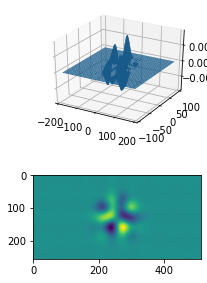

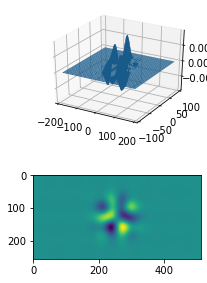

In [4]:
def test_func_xy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/1000)
    top_trig = 50*y*np.sin(x/10)+x*y*np.sin(y/10)+x*y*np.cos(x/10)-50*x*np.cos(y/10)
    return top_exp*top_trig/250000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_xy = test_func_xy(X,Y)
ax1.plot_surface(X,Y,f_xy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_xy)

def fft_partial_xy(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Ky)*(1j*Kx)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_xy = fft_partial_xy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_xy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_xy)

print("norm of difference",np.linalg.norm(f_xy-fft_f_xy))
print("norm of exact",np.linalg.norm(f_xy))
print("rel err", np.linalg.norm(f_xy-fft_f_xy)/np.linalg.norm(f_xy))
print("sum of exact f_xy",np.sum(f_xy))
print("sum of fft f_xy",np.sum(fft_f_xy))
print("mean of exact f_xy",np.mean(f_xy))
print("mean of fft f_xy",np.mean(fft_f_xy))
print("max of exact f_xy",np.max(f_xy))
print("max of fft f_xy",np.max(fft_f_xy))
print("min of exact f_xy",np.min(f_xy))
print("min of fft f_xy",np.min(fft_f_xy))
print("std dev of f_xy",np.std(f_xy))
print("std dev of fft f_xy",np.std(fft_f_xy))
print("max diff",np.max(np.abs(f_xy-fft_f_xy)))

norm of difference 0.001915566516279566
norm of exact 0.4889488214051267
rel err 0.003917723967049695
sum of exact f_xx -3.342418752056326e-14
sum of fft f_xx -1.9688098817830873e-17
mean of exact f_xx -2.5500631348085984e-19
mean of fft f_xx -1.5020827345146845e-22
max of exact f_xx 0.008040482804973723
max of fft f_xx 0.008071983197165998
min of exact f_xx -0.012649923482869424
min of fft f_xx -0.012699482391280164
std dev of f_xx 0.0013505430752684974
std dev of fft f_xx 0.0013558341302430097
max diff 4.955890841074062e-05


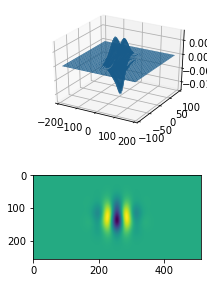

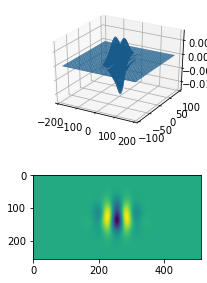

In [5]:
def test_func_xx(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/1000)
    top_trig = (x**2-500)*np.sin(y/10)+(x**2-3000)*np.cos(x/10)+100*x*np.sin(x/10)
    return top_exp*top_trig/250000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_xx = test_func_xx(X,Y)
ax1.plot_surface(X,Y,f_xx)
ax2 = fig.add_subplot(212)
ax2.imshow(f_xx)

def fft_partial_xx(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Kx)*(1j*Kx)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_xx = fft_partial_xx(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_xx)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_xx)

print("norm of difference",np.linalg.norm(f_xx-fft_f_xx))
print("norm of exact",np.linalg.norm(f_xx))
print("rel err", np.linalg.norm(f_xx-fft_f_xx)/np.linalg.norm(f_xx))
print("sum of exact f_xx",np.sum(f_xx))
print("sum of fft f_xx",np.sum(fft_f_xx))
print("mean of exact f_xx",np.mean(f_xx))
print("mean of fft f_xx",np.mean(fft_f_xx))
print("max of exact f_xx",np.max(f_xx))
print("max of fft f_xx",np.max(fft_f_xx))
print("min of exact f_xx",np.min(f_xx))
print("min of fft f_xx",np.min(fft_f_xx))
print("std dev of f_xx",np.std(f_xx))
print("std dev of fft f_xx",np.std(fft_f_xx))
print("max diff",np.max(np.abs(f_xx-fft_f_xx)))

norm of difference 0.003864996470002627
norm of exact 0.4889488118776786
rel err 0.007904705719930334
sum of exact f_yy -0.00041295696952005356
sum of fft f_yy -1.7381929229287607e-15
mean of exact f_yy -3.1506116448978696e-09
mean of fft f_yy -1.326135958045014e-20
max of exact f_yy 0.009531287377010603
max of fft f_yy 0.009606186220760019
min of exact f_yy -0.012233252952670798
min of fft f_yy -0.012329391106623835
std dev of f_yy 0.001350543048948716
std dev of fft f_yy 0.0013611569216134462
max diff 9.61381539530369e-05


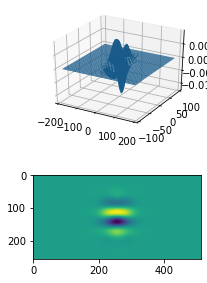

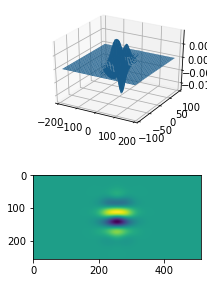

In [6]:
def test_func_yy(x,y):
    exponent = x**2+y**2
    top_exp = np.exp(-exponent/1000)
    top_trig = (y**2-500)*np.cos(x/10)+(y**2-3000)*np.sin(y/10)-100*y*np.cos(y/10)
    return top_exp*top_trig/250000

fig = plt.figure(figsize=(3,5))
ax1 = fig.add_subplot(211, projection='3d')
f_yy = test_func_yy(X,Y)
ax1.plot_surface(X,Y,f_yy)
ax2 = fig.add_subplot(212)
ax2.imshow(f_yy)

def fft_partial_yy(func,Lx,Ly):
    ny, nx = np.shape(func)
    kx = (2. * np.pi /Lx)*fftfreq(nx, 1. / nx)
    ky = (2. * np.pi /Ly)*fftfreq(ny, 1. / ny)
    Kx, Ky = np.meshgrid(kx, ky)
    return np.real(ifft2((1j*Ky)*(1j*Ky)*fft2(func)))

fig2 = plt.figure(figsize=(3,5))
ax12 = fig2.add_subplot(211, projection='3d')
fft_f_yy = fft_partial_yy(Z,Lx,Ly)
ax12.plot_surface(X,Y,fft_f_yy)
ax22 = fig2.add_subplot(212)
ax22.imshow(fft_f_yy)

print("norm of difference",np.linalg.norm(f_yy-fft_f_yy))
print("norm of exact",np.linalg.norm(f_yy))
print("rel err", np.linalg.norm(f_yy-fft_f_yy)/np.linalg.norm(f_yy))
print("sum of exact f_yy",np.sum(f_yy))
print("sum of fft f_yy",np.sum(fft_f_yy))
print("mean of exact f_yy",np.mean(f_yy))
print("mean of fft f_yy",np.mean(fft_f_yy))
print("max of exact f_yy",np.max(f_yy))
print("max of fft f_yy",np.max(fft_f_yy))
print("min of exact f_yy",np.min(f_yy))
print("min of fft f_yy",np.min(fft_f_yy))
print("std dev of f_yy",np.std(f_yy))
print("std dev of fft f_yy",np.std(fft_f_yy))
print("max diff",np.max(np.abs(f_yy-fft_f_yy)))

